In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
drive='/content/drive/My Drive/'  #To shorten the path

In [ ]:
#Data Preprocessing

import cv2
import os

data_path=drive+'Project Mask/dataset'

#To create labels for each category
categories=os.listdir(data_path) 
label=[i for i in range(len(categories))]
mapping=dict(zip(categories,label))

print(mapping)


{'with_mask': 0, 'without_mask': 1}


In [ ]:
data = [] 
ans= []   
size=100   #to have same size of image for entire dataset

for category in categories :

  folder= os.path.join(data_path, category)
  images=os.listdir(folder)

  for image in images :
    image_path=os.path.join(folder,image)
    img=cv2.imread(image_path)

    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    resize_image=cv2.resize(gray_scale,(size,size)) 

    data.append(resize_image)
    ans.append(mapping[category])

In [ ]:
import numpy as np
from keras.utils import np_utils

ans= np.array(ans)
data = np.array(data)/255.0   #to normalize the image
data=np.reshape(data,(data.shape[0],size,size,1))

print(data.shape)
ans=np_utils.to_categorical(ans) #one hot encoder

Using TensorFlow backend.


(1376, 100, 100, 1)


In [ ]:
#Building CNN
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#first CNN layer along with Relu and MaxPooling layers
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second CNN layer along with Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5)) #to prevent overfitting

model.add(Dense(50,activation='relu')) #Dense layer of 50 neurons
model.add(Dense(2,activation='softmax')) #Final layer with two outputs, one for each category

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #metric used to judge the performance of model

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_ans,test_ans=train_test_split(data,ans,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_ans,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 2s 2ms/step - loss: 0.7177 - accuracy: 0.4980 - val_loss: 0.6800 - val_accuracy: 0.5282
Epoch 2/20
990/990 [==============================] - 2s 2ms/step - loss: 0.6472 - accuracy: 0.5808 - val_loss: 0.5988 - val_accuracy: 0.6935
Epoch 3/20
990/990 [==============================] - 2s 2ms/step - loss: 0.5280 - accuracy: 0.7343 - val_loss: 0.3891 - val_accuracy: 0.8548
Epoch 4/20
990/990 [==============================] - 2s 2ms/step - loss: 0.3518 - accuracy: 0.8586 - val_loss: 0.3073 - val_accuracy: 0.8629
Epoch 5/20
990/990 [==============================] - 2s 2ms/step - loss: 0.2560 - accuracy: 0.9040 - val_loss: 0.2351 - val_accuracy: 0.9153
Epoch 6/20
990/990 [==============================] - 2s 2ms/step - loss: 0.1792 - accuracy: 0.9374 - val_loss: 0.1966 - val_accuracy: 0.9315
Epoch 7/20
990/990 [==============================] - 2s 2ms/step - loss: 0.1961 - accuracy: 0.9152 - 

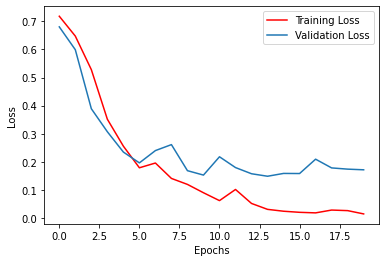

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

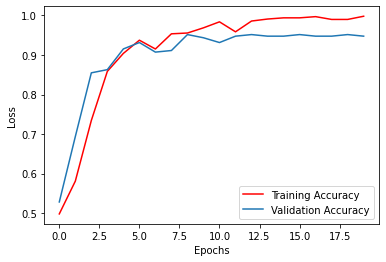

In [ ]:
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_ans))

138/138 [==============================] - 0s 859us/step
[0.1587168966838415, 0.9492753744125366]
